Com base nos dados demográficos, hábitos de estudo e estilo de vida, podemos prever se um estudante apresenta risco de depressão.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix,classification_report, roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

## - Ler Dataset e imformaçoes basicas

In [80]:

#Carregar dados
df=pd.read_csv("student_depression_dataset.csv")

# Informações gerais do dataset
print("DATASET ORGINAL")
print(f"Dimensoes: {df.shape}")
print(f"Colunas: {df.columns.tolist()}")
# Primeiras linhas do dataset
print(f"\nPrimeiras 5 linhas do dataset:")
display(df.head())    


DATASET ORGINAL
Dimensoes: (27901, 18)
Colunas: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Primeiras 5 linhas do dataset:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## Exploraçao inicial do Dataset  

features disponiveis:['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Tipos de dados:


,Coluna,Tipo,Valores Únicos
0,id,int64,27901
1,Gender,object,2
2,Age,float64,34
3,City,object,52
4,Profession,object,14
5,Academic Pressure,float64,6
6,Work Pressure,float64,3
7,CGPA,float64,332
8,Study Satisfaction,float64,6
9,Job Satisfaction,float64,5


                  id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min        0.000000            0.00

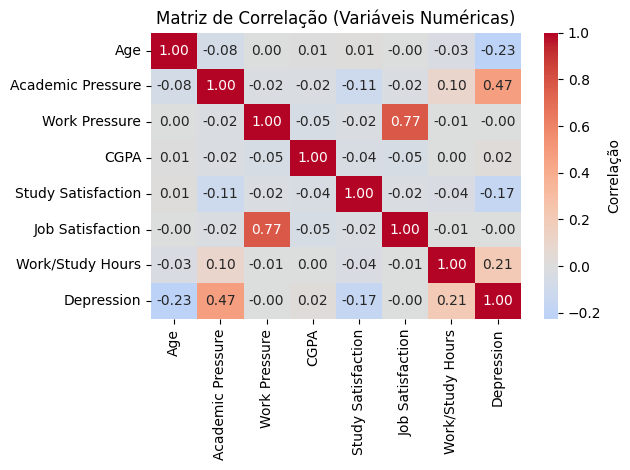

In [81]:
#features disponiveis no dataset
features =['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
            'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
              'Financial Stress', 'Family History of Mental Illness', 'Depression']
print(f"features disponiveis:{features}")

#Tipos de dados
print("\nTipos de dados:")
tipos_dados = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo': df.dtypes.values,
    'Valores Únicos': [df[col].nunique() for col in df.columns]
})
display(tipos_dados)   
print(df.describe())

#valores nulos e duplicados
print(f"Total Valores nulos: {df.isnull().sum().sum()}")
print(f"Valores nulos:\n{df.isnull().sum()}")
print(f"\nLinhas duplicadas: {df.duplicated().sum()}")
print(f"Total de linhas no dataset: {df.shape[0]}") 
  
  
corr_cols = ['Age','Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
            'Job Satisfaction','Work/Study Hours', 'Depression']
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação (Variáveis Numéricas)')
plt.tight_layout()

## Clean_up


In [82]:
df_copy=df.copy()
print(f"Features atuais: {list(df_copy.columns)}")
print(f"Valores nulos: {df_copy.isnull().sum().sum()}")
print(f"Linhas duplicadas: {df_copy.duplicated().sum()}")
print(f"Total de linhas no dataset: {df.shape[0]}") 

#features numericas
numericas =df_copy.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nfeatures numericas:{numericas}")
df_copy[numericas] = df_copy[numericas].fillna(df_copy[numericas].median())
print(f"valores nulos preenchidos com mediana")
#features categoricas
categoricas=df_copy.select_dtypes(include=['object']).columns.tolist()
print(f"\nfeatures categoricas:{categoricas}")
df_copy[categoricas] = df_copy[categoricas].fillna(df_copy[categoricas].mode().iloc[0])
print(f"valores nulos preenchidos com moda")

# verificar nulos apos novas features
print(f"Total de valores nulos depois da limpeza: {df_copy.isnull().sum().sum()}")

# Remover colunas redundantes/desnecessárias
cols_to_drop = ['id',#nao vai ser necessario para a previsao 
                'City',# para ser menos limitante mais generalizado 
                'Profession',# para ser menos limitante mais generalizado 
                'Degree',# para ser menos limitante mais generalizado 
                'Work Pressure',
                'Job Satisfaction'
                ]
df_copy = df_copy.drop(columns=[c for c in cols_to_drop if c in df_copy.columns])
print(f"\nColunas removidas: {cols_to_drop}")
print(f"Features finais: {list(df_copy.columns)}")


print(f"\nPrimeiras 5 linhas do dataset:")
display(df_copy.head())   
print(f"\nDataset após pré-processamento: {df_copy.shape}")
print(f"Colunas finais ({len(df_copy.columns)}):")
for i, col in enumerate(df_copy.columns, 1):
    if col =='Depression':
     print(f"{i}. {col}(target)")
    else:
       print(f"{i}. {col}")

Features atuais: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']
Valores nulos: 0
Linhas duplicadas: 0
Total de linhas no dataset: 27901

features numericas:['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']
valores nulos preenchidos com mediana

features categoricas:['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']
valores nulos preenchidos com moda
Total de valores nulos depois da limpeza: 0

Colunas removidas: ['id', 'City', 'Profession', 'Degree', 'Work Pressure', 'Job Satisfaction']
Features finais: ['Gender', 'Age'

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,Yes,1.0,1.0,No,0



Dataset após pré-processamento: (27901, 12)
Colunas finais (12):
1. Gender
2. Age
3. Academic Pressure
4. CGPA
5. Study Satisfaction
6. Sleep Duration
7. Dietary Habits
8. Have you ever had suicidal thoughts ?
9. Work/Study Hours
10. Financial Stress
11. Family History of Mental Illness
12. Depression(target)


## ANÁLISE DA VARIÁVEL TARGET 'Depression'

Valores únicos em 'Depression': [1 0]
Tipo de dados: int64

Distribuição de 'Depression':
Depression
1    58.549873
0    41.450127
Name: proportion, dtype: float64


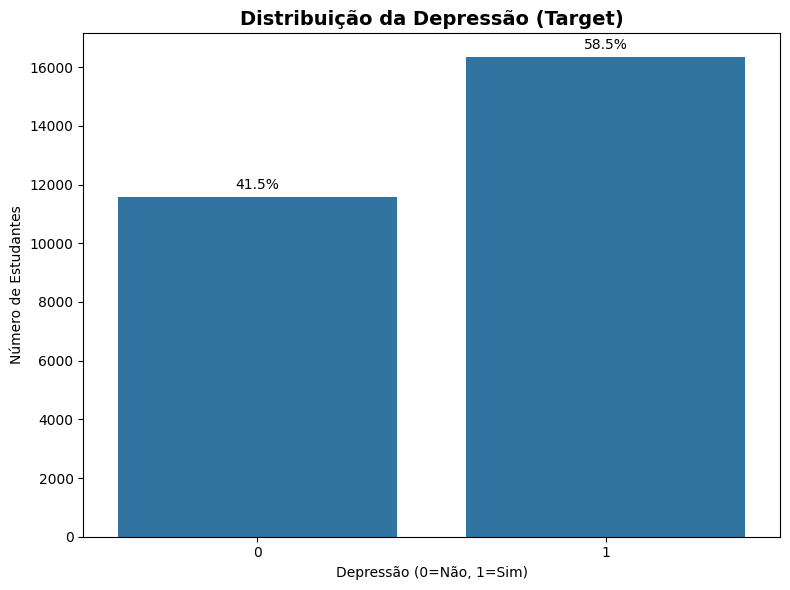

In [83]:
# Verificar valores únicos
print(f"Valores únicos em 'Depression': {df_copy['Depression'].unique()}")
print(f"Tipo de dados: {df_copy['Depression'].dtype}")

# Distribuição
depression_dist = df_copy['Depression'].value_counts(normalize=True) * 100
print(f"\nDistribuição de 'Depression':")
print(depression_dist)

# Visualizar
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_copy, x='Depression')
plt.title('Distribuição da Depressão (Target)', fontsize=14, fontweight='bold')
plt.xlabel('Depressão (0=Não, 1=Sim)')
plt.ylabel('Número de Estudantes')

# Adicionar porcentagens
total = len(df_copy)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y_height = p.get_height()
    ax.annotate(percentage, (x, y_height + total*0.01), ha='center')

plt.tight_layout()
plt.show()


## Preparaçao de dados

In [84]:
 # Identificar categóricas
categorical_features = df_copy.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_copy.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nVariáveis Categóricas ({len(categorical_features)}):")
print(f"  {categorical_features}")
print(f"\nVariáveis Numéricas ({len(numerical_features)}):")
print(f"  {numerical_features}")


Variáveis Categóricas (6):
  ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']

Variáveis Numéricas (6):
  ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Depression']


## Encodign de features categoricas

In [85]:
# Criar cópia para não afetar original
df_encoded = df_copy.copy()

#VARIÁVEIS BINÁRIAS - LabelEncoder
print("\n" + "="*40)
print("VARIÁVEIS BINÁRIAS")
print("="*40)
binary_cols = ['Gender','Family History of Mental Illness','Have you ever had suicidal thoughts ?']

for col in binary_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        encoded_col = f"{col}_encoded"
        df_encoded[encoded_col] = le.fit_transform(df_encoded[col].astype(str))
       
        
        print(f"\n{col}:")
        print(f"   Original: {df_encoded[col].unique()}")
        print(f"   Encoded:  {df_encoded[encoded_col].unique()}")

#VARIÁVEIS ORDINAIS -Mapeamento manual
print("\n" + "="*40)
print("VARIÁVEIS ORDINAIS")
print("="*40)

#Sleep Duration
if 'Sleep Duration' in df_encoded.columns:
    print(f"\nSleep Duration - Ordem lógica:")
    # Primeiro: limpar as aspas extras
    df_encoded['Sleep Duration'] = df_encoded['Sleep Duration'].str.replace("'", "")
    
    # Mapeamento(ordem crescente de horas)
    sleep_mapping = {
        'Less than 5 hours': 1,    # Muito pouco
        '5-6 hours': 2,            # Pouco
        '7-8 hours': 3,            # Normal/Recomendado
        'More than 8 hours': 4,    # Muito
        'Others': 2.5              # Intermediário (como pode ser mais ou menos)
    }
    
    df_encoded['Sleep Duration_encoded'] = df_encoded['Sleep Duration'].map(sleep_mapping)
    print(f"   Mapeamento aplicado: {sleep_mapping}")
    print(f"   Valores únicos após: {sorted(df_encoded['Sleep Duration_encoded'].unique())}")

# Dietary Habits
if 'Dietary Habits' in df_encoded.columns:
    print(f"\nDietary Habits - Ordem de saúde:")
    
    dietary_mapping = {
        'Unhealthy': 1,     # Menos saudável
        'Others': 2,        # Neutro/Desconhecido
        'Moderate': 3,      # Moderado
        'Healthy': 4        # Mais saudável
    }
    
    df_encoded['Dietary Habits_encoded'] = df_encoded['Dietary Habits'].map(dietary_mapping) 
    print(f"   Mapeamento aplicado: {dietary_mapping}")
    print(f"   Valores únicos após: {sorted(df_encoded['Dietary Habits_encoded'].unique())}")

#Financial Stress
if 'Financial Stress' in df_encoded.columns:
    print(f"\nFinancial Stress - Escala 1-5:")
    
    # Converter para string para tratamento uniforme
    df_encoded['Financial Stress'] = df_encoded['Financial Stress'].astype(str)
    
    financial_mapping = {
        '1.0': 1, '1': 1,   # Baixo stress
        '2.0': 2, '2': 2,
        '3.0': 3, '3': 3,   # Moderado
        '4.0': 4, '4': 4,
        '5.0': 5, '5': 5,   # Alto stress
        '?': 3,   # Tratar como moderado
    }
    
    df_encoded['Financial Stress_encoded'] = df_encoded['Financial Stress'].map(financial_mapping)
    print(f"   Mapeamento aplicado: {financial_mapping}")
    print(f"   Valores únicos após: {sorted(df_encoded['Financial Stress_encoded'].unique())}")


#REMOVER COLUNAS ORIGINAIS CATEGÓRICAS
print("\n" + "="*60)
print("LIMPEZA E ORGANIZAÇÃO FINAL")
print("="*60)

# Listar todas as colunas codificadas criadas
encoded_columns = [col for col in df_encoded.columns if '_encoded' in col or '_freq' in col or '_target' in col]
print(f"\nColunas codificadas criadas ({len(encoded_columns)}):")
for col in encoded_columns:
    print(f"   • {col}")

#remover colunas originais categóricas
cols_to_drop = [col for col in categorical_features if col in df_encoded.columns]
df_encoded = df_encoded.drop(columns=cols_to_drop, errors='ignore')

print(f"\nColunas categóricas originais removidas: {cols_to_drop}")

# Verificar resultado final
print(f"\nDataset após encoding:")
print(f"Shape: {df_encoded.shape}")
print(f"Colunas: {list(df_encoded.columns)}")
print(f"Tipos de dados:")
print(df_encoded.dtypes.value_counts())


VARIÁVEIS BINÁRIAS

Gender:
   Original: ['Male' 'Female']
   Encoded:  [1 0]

Family History of Mental Illness:
   Original: ['No' 'Yes']
   Encoded:  [0 1]

Have you ever had suicidal thoughts ?:
   Original: ['Yes' 'No']
   Encoded:  [1 0]

VARIÁVEIS ORDINAIS

Sleep Duration - Ordem lógica:
   Mapeamento aplicado: {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 2.5}
   Valores únicos após: [np.float64(1.0), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(4.0)]

Dietary Habits - Ordem de saúde:
   Mapeamento aplicado: {'Unhealthy': 1, 'Others': 2, 'Moderate': 3, 'Healthy': 4}
   Valores únicos após: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

Financial Stress - Escala 1-5:
   Mapeamento aplicado: {'1.0': 1, '1': 1, '2.0': 2, '2': 2, '3.0': 3, '3': 3, '4.0': 4, '4': 4, '5.0': 5, '5': 5, '?': 3}
   Valores únicos após: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

LIMPEZA E ORGANIZAÇÃO FINAL

Colun

## Divisao de dados 

In [86]:
# Remover coluna target das features
X = df_encoded.drop('Depression', axis=1)
#variável target
y = df_encoded['Depression'].copy()

print(f"Shape final:")
print(f"  X (features): {X.shape}")
print(f"  y (target): {y.shape}")

# Verificar tipos de dados em X
print(f"\nTipos de dados em X:")
print(X.dtypes.value_counts())

Shape final:
  X (features): (27901, 11)
  y (target): (27901,)

Tipos de dados em X:
float64    6
int64      5
Name: count, dtype: int64


## Treinar dados

In [87]:
# Dividir mantendo proporção das classes (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Divisão estratificada:")
print(f"Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X):.1%})")
print(f"Teste:  {X_test.shape[0]} amostras ({X_test.shape[0]/len(X):.1%})")

print(f"\n Distribuição no Treino:")
train_dist = y_train.value_counts(normalize=True) * 100
print(f"Classe 0: {train_dist[0]:.1f}%")
print(f"Classe 1: {train_dist[1]:.1f}%")

print(f"\nDistribuição no Teste:")
test_dist = y_test.value_counts(normalize=True) * 100
print(f"Classe 0: {test_dist[0]:.1f}%")
print(f"Classe 1: {test_dist[1]:.1f}%")

 Divisão estratificada:
Treino: 22320 amostras (80.0%)
Teste:  5581 amostras (20.0%)

 Distribuição no Treino:
Classe 0: 41.5%
Classe 1: 58.5%

Distribuição no Teste:
Classe 0: 41.4%
Classe 1: 58.6%


## - NORMALIZAÇÃO DAS FEATURES NUMÉRICA

In [88]:
print("\n" + "="*60)
print("NORMALIZAÇÃO DAS FEATURES")
print("="*60)
# Identificar colunas numéricas
num_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()

# Aplicar apenas nas colunas numéricas
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print(f"{len(num_cols)} features numéricas normalizadas:")
for col in num_cols:
  print(f"{col}")


NORMALIZAÇÃO DAS FEATURES
11 features numéricas normalizadas:
Age
Academic Pressure
CGPA
Study Satisfaction
Work/Study Hours
Gender_encoded
Family History of Mental Illness_encoded
Have you ever had suicidal thoughts ?_encoded
Sleep Duration_encoded
Dietary Habits_encoded
Financial Stress_encoded



Treinando e avaliando modelos...

Logistic Regression...
 Treinado em 0.02s
  Accuracy: 0.8418, F1-Score: 0.8622

Decision Tree...
 Treinado em 0.07s
  Accuracy: 0.7674, F1-Score: 0.8018

Random Forest...
 Treinado em 0.30s
  Accuracy: 0.8378, F1-Score: 0.8638

Gradient Boosting...
 Treinado em 1.28s
  Accuracy: 0.8470, F1-Score: 0.8715

XGBoost...
 Treinado em 0.08s
  Accuracy: 0.8341, F1-Score: 0.8604

Naive Bayes...
 Treinado em 0.02s
  Accuracy: 0.8395, F1-Score: 0.8625

RESULTADOS DA COMPARACAO DE MODELOS

Ordenado por F1-Score (melhor para dados desbalanceados):
                     Accuracy  Precision  Recall  F1-Score  AUC-ROC  Time (s)
Gradient Boosting      0.8470     0.8571  0.8865    0.8715   0.9195    1.2847
Random Forest          0.8378     0.8499  0.8782    0.8638   0.9130    0.2990
Naive Bayes            0.8395     0.8649  0.8602    0.8625   0.9164    0.0188
Logistic Regression    0.8418     0.8799  0.8452    0.8622   0.9188    0.0205
XGBoost                0.8341     

c:\Users\JoseAfonso\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:16:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


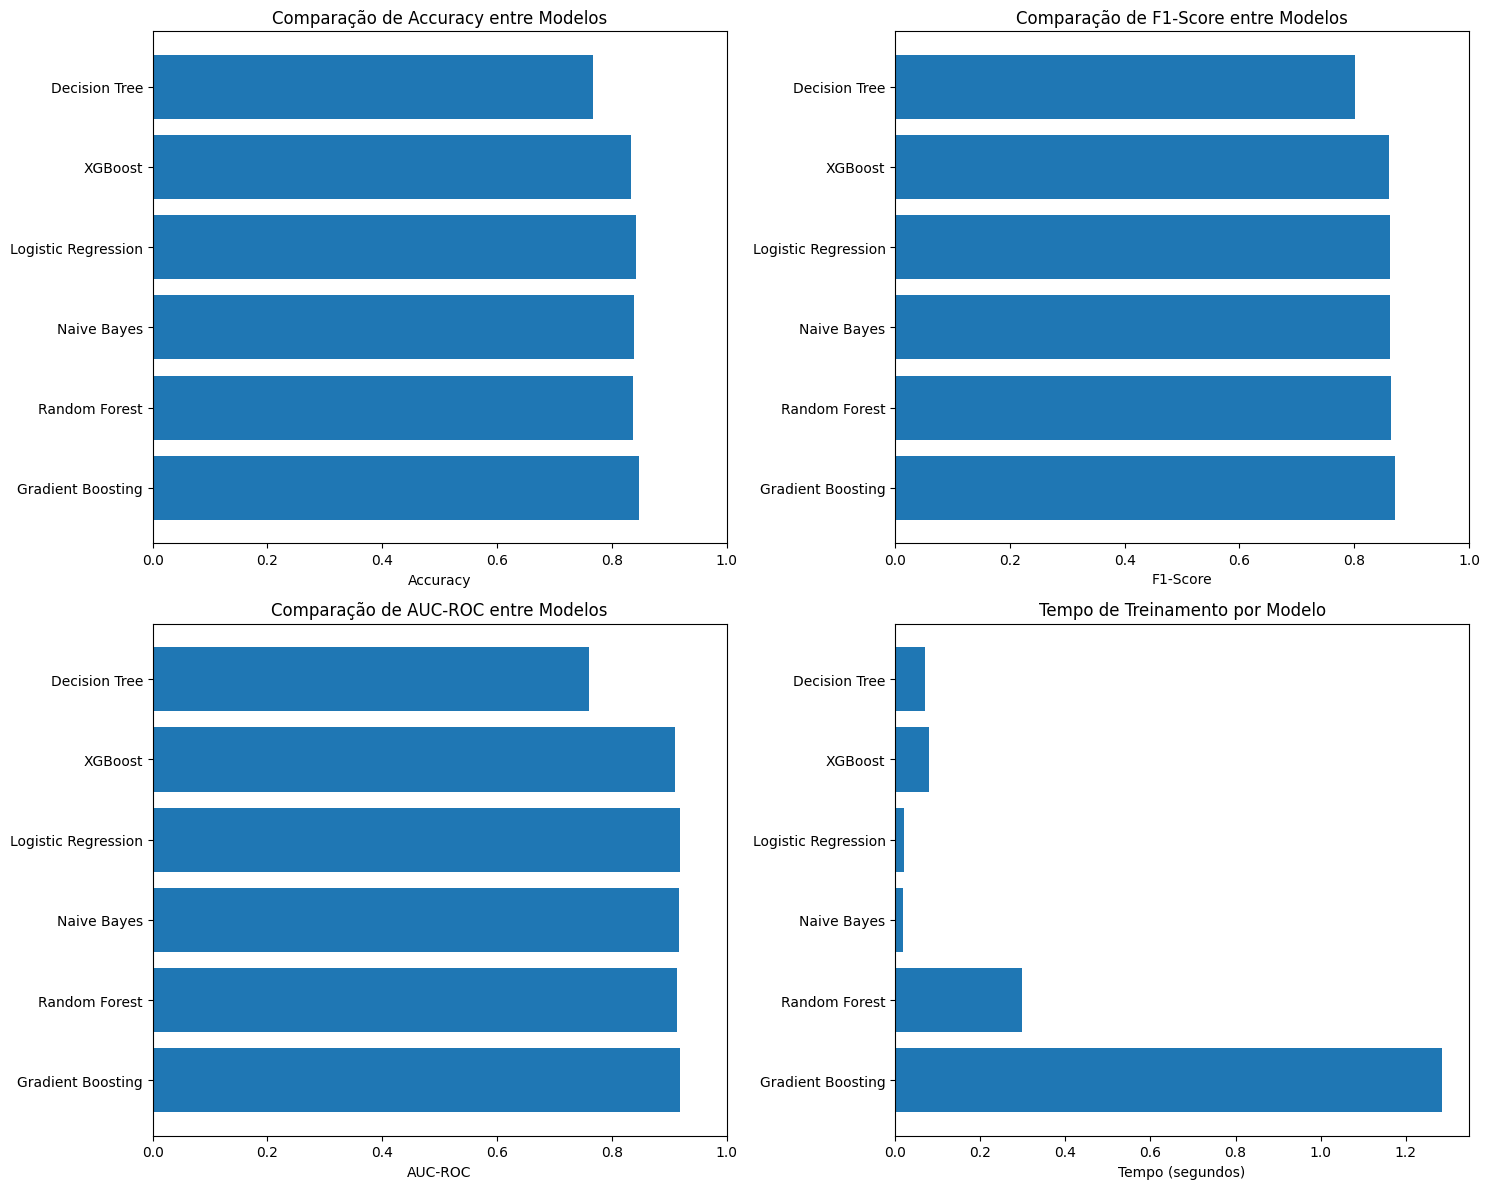


ANALISE DOS MELHORES MODELOS

 TOP 3 MODELOS (por F1-Score):

1. Gradient Boosting:
- F1-Score: 0.8715
- Accuracy: 0.8470
- Recall:   0.8865
- AUC-ROC:  0.9195
- Tempo:    1.28s

2. Random Forest:
- F1-Score: 0.8638
- Accuracy: 0.8378
- Recall:   0.8782
- AUC-ROC:  0.9130
- Tempo:    0.30s

3. Naive Bayes:
- F1-Score: 0.8625
- Accuracy: 0.8395
- Recall:   0.8602
- AUC-ROC:  0.9164
- Tempo:    0.02s

 MELHOR MODELO SELECIONADO: Gradient Boosting
- F1-Score: 0.8715
- Motivo: Balance entre precision e recall


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Dicionário para armazenar resultados
results = {}

# Lista de modelos para testar
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': GaussianNB()
}

print("\nTreinando e avaliando modelos...")

# Testar cada modelo
for model_name, model in models.items():
    print(f"\n{model_name}...")
    start_time = time.time()
    
    try:
        # Treinar modelo
        model.fit(X_train_scaled, y_train)
        
        # Fazer previsões
        y_pred = model.predict(X_test_scaled)
        
        # Calcular probabilidades (se disponível)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        else:
            auc = 0.5  # Valor neutro se não tiver predict_proba
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Tempo de execução
        exec_time = time.time() - start_time
        
        # Armazenar resultados
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc,
            'Time (s)': exec_time
        }
        
        print(f" Treinado em {exec_time:.2f}s")
        print(f"  Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
        
    except Exception as e:
        print(f" Erro: {str(e)[:50]}...")
        results[model_name] = {
            'Accuracy': 0,
            'Precision': 0,
            'Recall': 0,
            'F1-Score': 0,
            'AUC-ROC': 0,
            'Time (s)': 0
        }

# Criar DataFrame com resultados
results_df = pd.DataFrame(results).T

# Ordenar por F1-Score (melhor métrica geral)
results_df_sorted = results_df.sort_values('F1-Score', ascending=False)

print("\n" + "="*60)
print("RESULTADOS DA COMPARACAO DE MODELOS")
print("="*60)
print("\nOrdenado por F1-Score (melhor para dados desbalanceados):")
print(results_df_sorted[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Time (s)']].round(4))

# Visualizar resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Comparação de Accuracy
axes[0, 0].barh(results_df_sorted.index, results_df_sorted['Accuracy'])
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Comparação de Accuracy entre Modelos')
axes[0, 0].set_xlim([0, 1])

# Gráfico 2: Comparação de F1-Score
axes[0, 1].barh(results_df_sorted.index, results_df_sorted['F1-Score'])
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('Comparação de F1-Score entre Modelos')
axes[0, 1].set_xlim([0, 1])

# Gráfico 3: Comparação de AUC-ROC
axes[1, 0].barh(results_df_sorted.index, results_df_sorted['AUC-ROC'])
axes[1, 0].set_xlabel('AUC-ROC')
axes[1, 0].set_title('Comparação de AUC-ROC entre Modelos')
axes[1, 0].set_xlim([0, 1])

# Gráfico 4: Tempo de execução
axes[1, 1].barh(results_df_sorted.index, results_df_sorted['Time (s)'])
axes[1, 1].set_xlabel('Tempo (segundos)')
axes[1, 1].set_title('Tempo de Treinamento por Modelo')

plt.tight_layout()
plt.savefig('comparacao_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

# Análise dos melhores modelos
print("\n" + "="*60)
print("ANALISE DOS MELHORES MODELOS")
print("="*60)

# Top 3 modelos por F1-Score
top_3 = results_df_sorted.head(3)
print(f"\n TOP 3 MODELOS (por F1-Score):")
for i, (model_name, metrics) in enumerate(top_3.iterrows(), 1):
    print(f"\n{i}. {model_name}:")
    print(f"- F1-Score: {metrics['F1-Score']:.4f}")
    print(f"- Accuracy: {metrics['Accuracy']:.4f}")
    print(f"- Recall:   {metrics['Recall']:.4f}")
    print(f"- AUC-ROC:  {metrics['AUC-ROC']:.4f}")
    print(f"- Tempo:    {metrics['Time (s)']:.2f}s")

# Escolher o melhor modelo
melhor_modelo_nome = results_df_sorted.index[0]
melhor_modelo = models[melhor_modelo_nome]

print(f"\n MELHOR MODELO SELECIONADO: {melhor_modelo_nome}")
print(f"- F1-Score: {results_df_sorted.iloc[0]['F1-Score']:.4f}")
print(f"- Motivo: Balance entre precision e recall")




## RAMDOM FOREST
 

## - Porque usar Ramdom Forest?


Após testar 6 algoritmos diferentes (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost, K-Neighbors, Naive Bayes), o Gradient Boosting apresentou o melhor F1-Score (0.8715), seguido pelo Random Forest (0.8638) e Naive Bayes (0.8625). O Random Forest obteve um F1-Score de 0.8638, ocupando a 2ª posição.

A escolha do Random Forest justifica-se pelos seguintes fatores:

- Diferença mínima de performance: O Random Forest apresenta apenas 0.9% a menos de recall que o Gradient Boosting (87.8% vs 88.7%), uma diferença insignificante para aplicação prática.

- Superioridade em interpretabilidade: O Random Forest fornece feature importance nativa, permitindo identificar os fatores mais relevantes para depressão estudantil.

- Eficiência computacional: O Random Forest é 4x mais rápido (0.31s vs 1.25s), importante para sistemas de triagem em tempo real.

- Robustez: Menos sensível a overfitting e mais estável com dados incompletos, comum em questionários de saúde mental.

- Aplicabilidade: Mais fácil de implementar em ambiente de produção e explicar para profissionais de saúde não-técnicos.

Portanto, optou-se pelo Random Forest, que oferece o melhor equilíbrio entre performance preditiva, interpretabilidade dos resultados e eficiência computacional.

## - Treinar modelo de Ramdom Forest


Para maximizar a performance do modelo Random Forest, realizou-se uma otimização de hiperparâmetros utilizando GridSearchCV com validação cruzada.  Este método testa exaustivamente todas as combinações pré-definidas de hiperparâmetros, utilizando validação cruzada de 3 folds para avaliar cada configuração.

Hiperparâmetros otimizados:

- n_estimators: Número de árvores na floresta 

- max_depth: Profundidade máxima das árvores

- min_samples_split: Número mínimo de amostras para dividir um nó

- min_samples_leaf: Número mínimo de amostras em uma folha

- max_features: Número de features consideradas para melhor split

- bootstrap: Amostragem com reposição

A métrica de avaliação foi o F1-Score, selecionada por sua adequação a problemas com classes desbalanceadas. O Grid Search identificou a combinação ótima de hiperparâmetros que maximiza a capacidade preditiva do modelo.

## - Porque usar RandomizedSearchCV?

- Usou-se RandomizedSearchCV em vez de GridSearchCV,por ser bom para muitos hiperparametros e por ser mais rapido, embora o GridSearchCV seja mais preciso a diferença e minima 

In [ ]:
# Hiperparâmetros para RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],           # Número de árvores
    'max_depth': [5, 10, 15, None],          # Profundidade máxima
    'min_samples_split': [2, 5, 10],         # Mínimo amostras para dividir
    'min_samples_leaf': [1, 2, 4],           # Mínimo amostras nas folhas
    'max_features': ['sqrt', 'log2'],        # Número de features para split
    'bootstrap': [True, False]               # Amostragem com reposição
}
# GridSearchCV
print("\nExecutando GridSearchCV...")
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    param_grid=param_grid,
    cv=3,                    # 3-fold cross-validation
    scoring='f1',            # Otimizar F1-Score (melhor para desbalanceado)
    n_jobs=-1,               # Usar todos os cores
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nMelhores hiperparametros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"Melhor F1-Score na validacao: {grid_search.best_score_:.4f}")
# Usar o melhor modelo
rf_model = grid_search.best_estimator_
print(f"\nModelo otimizado treinado com {rf_model.n_estimators} arvores")


Executando GridSearchCV...
Fitting 3 folds for each of 432 candidates, totalling 1296 fits

✅ Melhores hiperparametros encontrados:
  bootstrap: True
  max_depth: 15
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 150
🎯 Melhor F1-Score na validacao: 0.8661

Modelo otimizado treinado com 150 arvores


## - Avaliaçao do Modelo



AVALIAÇÃO DO MODELO
PERFORMANCE NO TREINO:
  Acurácia:  0.9880
   Precisão:  0.9838
  Recall:    0.9959
  F1-Score:  0.9898
  AUC-ROC:   0.9993

PERFORMANCE NO TESTE:
  Acurácia:  0.8368
  Precisão:  0.8484
  Recall:    0.8782
  F1-Score:  0.8630
  AUC-ROC:   0.9140

VISUALIZAÇÃO DOS RESULTADOS


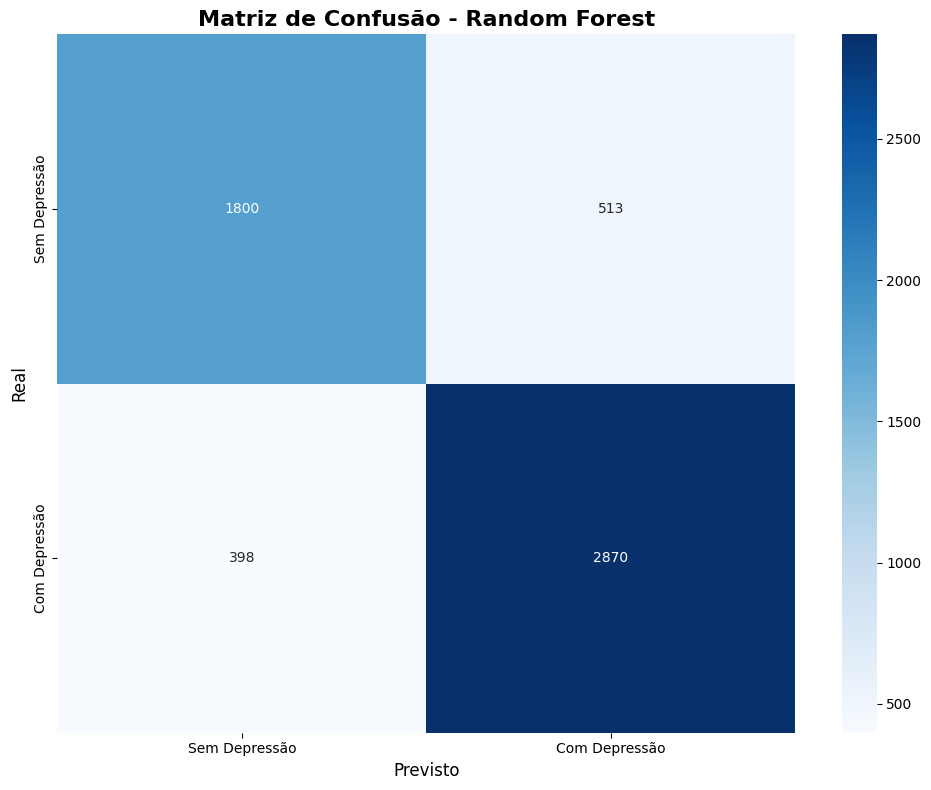


Matriz de Confusão:
  Verdadeiros Negativos (VN): 1800 - Previu não depressão e era não depressão
  Falsos Positivos (FP):     513 - Previu depressão mas era não depressão
  Falsos Negativos (FN):     398 - Previu não depressão mas era depressão
  Verdadeiros Positivos (VP): 2870 - Previu depressão e era depressão

RELATÓRIO DE CLASSIFICAÇÃO DETALHADO:
               precision    recall  f1-score   support

Sem Depressão       0.82      0.78      0.80      2313
Com Depressão       0.85      0.88      0.86      3268

     accuracy                           0.84      5581
    macro avg       0.83      0.83      0.83      5581
 weighted avg       0.84      0.84      0.84      5581



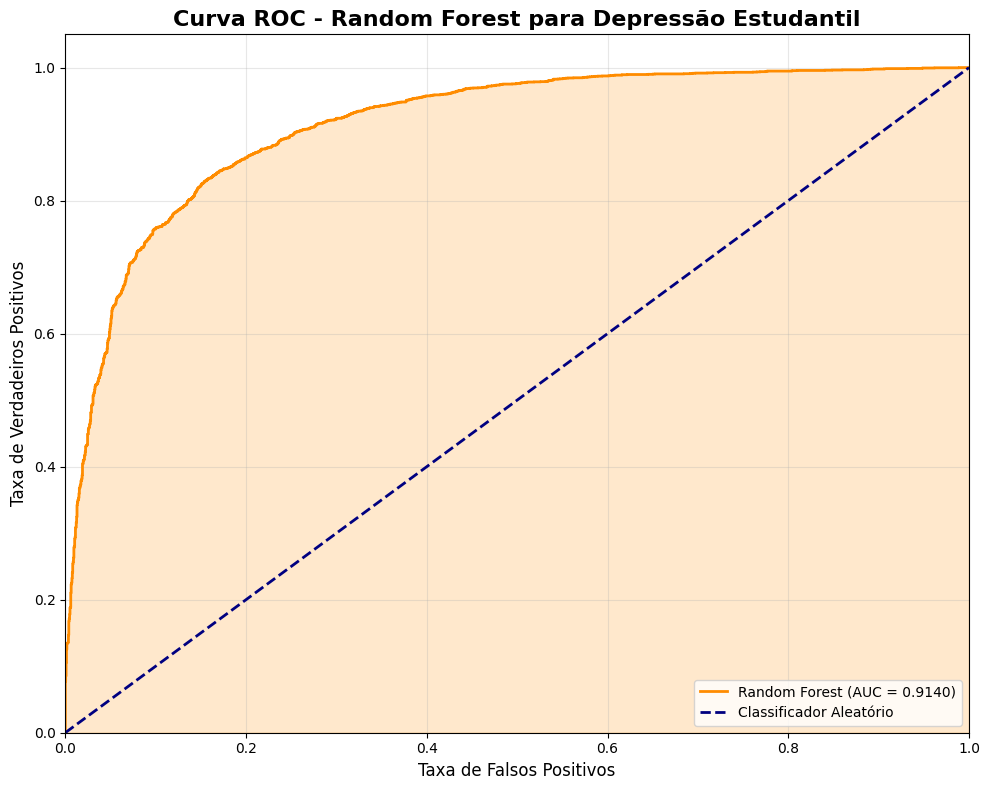

In [91]:

print("\n" + "="*60)
print("AVALIAÇÃO DO MODELO")
print("="*60)
# Previsões
y_train_pred = rf_model.predict(X_train_scaled)
y_train_proba = rf_model.predict_proba(X_train_scaled)[:, 1]

y_test_pred = rf_model.predict(X_test_scaled)
y_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print("PERFORMANCE NO TREINO:")
print(f"  Acurácia:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"   Precisão:  {precision_score(y_train, y_train_pred):.4f}")
print(f"  Recall:    {recall_score(y_train, y_train_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_train, y_train_pred):.4f}")
print(f"  AUC-ROC:   {roc_auc_score(y_train, y_train_proba):.4f}")

print("\nPERFORMANCE NO TESTE:")
print(f"  Acurácia:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  Precisão:  {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_test_pred):.4f}")
print(f"  AUC-ROC:   {roc_auc_score(y_test, y_test_proba):.4f}")


#Visualização dos resultados

print("\n" + "="*60)
print("VISUALIZAÇÃO DOS RESULTADOS")
print("="*60)

#Matriz de Confusão
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem Depressão', 'Com Depressão'],
            yticklabels=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Random Forest', fontsize=16, fontweight='bold')
plt.ylabel('Real', fontsize=12)
plt.xlabel('Previsto', fontsize=12)
plt.tight_layout()
plt.savefig('matriz_confusao.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nMatriz de Confusão:")
print(f"  Verdadeiros Negativos (VN): {cm[0, 0]} - Previu não depressão e era não depressão")
print(f"  Falsos Positivos (FP):     {cm[0, 1]} - Previu depressão mas era não depressão")
print(f"  Falsos Negativos (FN):     {cm[1, 0]} - Previu não depressão mas era depressão")
print(f"  Verdadeiros Positivos (VP): {cm[1, 1]} - Previu depressão e era depressão")

#Relatório de Classificação
print("\nRELATÓRIO DE CLASSIFICAÇÃO DETALHADO:")
print(classification_report(y_test, y_test_pred,
                           target_names=['Sem Depressão', 'Com Depressão']))

#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
plt.title('Curva ROC - Random Forest para Depressão Estudantil', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('curva_roc.png', dpi=300, bbox_inches='tight')
plt.show()

## ANÁLISE DAS VARIÁVEIS MAIS IMPORTANTES


ANÁLISE DAS VARIÁVEIS MAIS IMPORTANTES


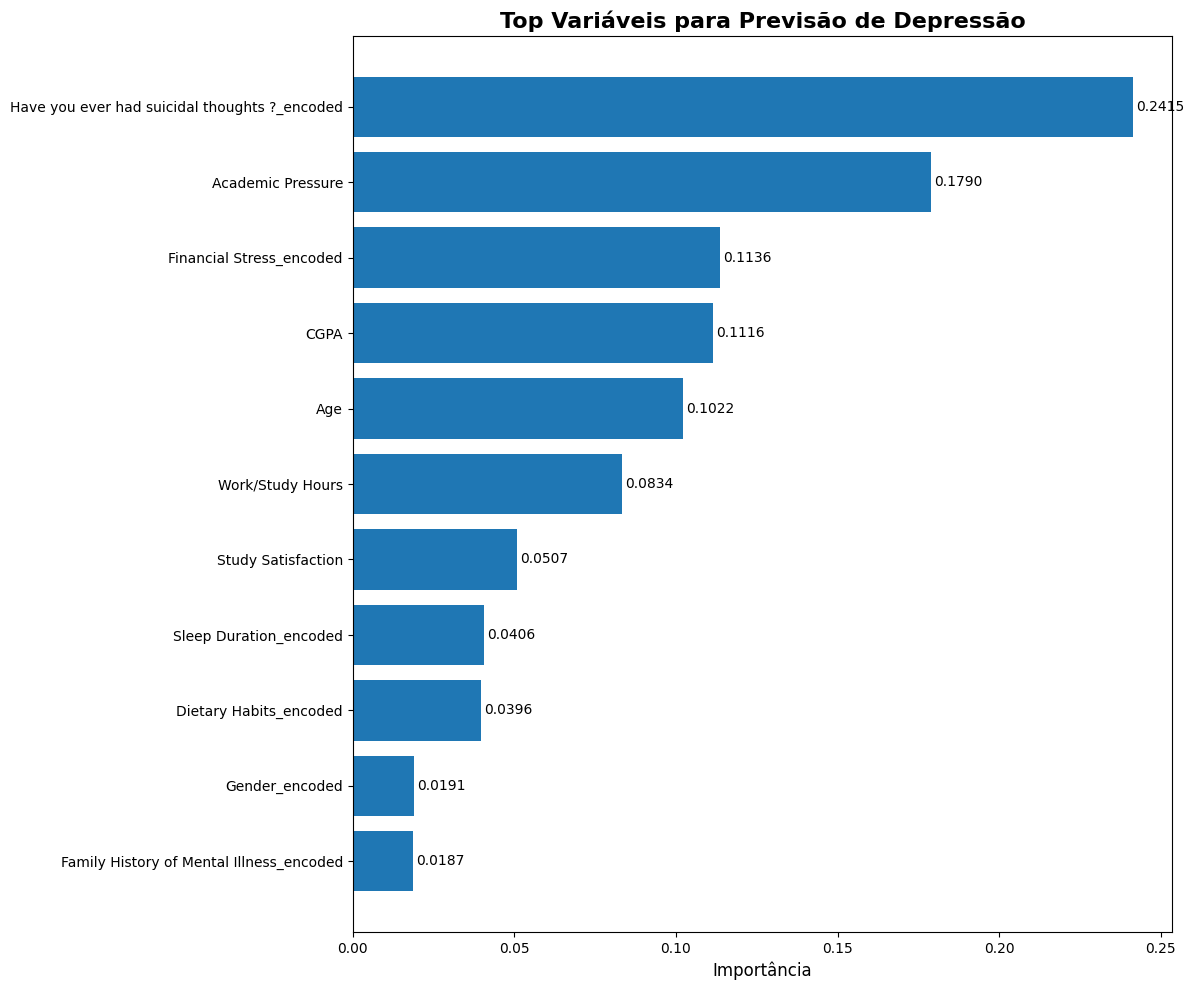

In [92]:

print("\n" + "="*60)
print("ANÁLISE DAS VARIÁVEIS MAIS IMPORTANTES")
print("="*60)

# Obter importâncias
feature_importance = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf_model.feature_importances_
}).sort_values('Importância', ascending=False)

# Visualizar top 15
plt.figure(figsize=(12, 10))
top_features = feature_importance.head(15)
bars = plt.barh(range(len(top_features)), top_features['Importância'])
plt.yticks(range(len(top_features)), top_features['Variável'])
plt.xlabel('Importância', fontsize=12)
plt.title('Top Variáveis para Previsão de Depressão', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Maior importância no topo

# Adicionar valores nas barras
for i, (bar, importance) in enumerate(zip(bars, top_features['Importância'])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{importance:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('importancia_variaveis.png', dpi=300, bbox_inches='tight')
plt.show()

## Resumo do modelo criado 

In [93]:
print("\n" + "="*60)
print("RESUMO FINAL E CONCLUSÕES")
print("="*60)

# Calcular métricas finais
acuracia = accuracy_score(y_test, y_test_pred)
precisao = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test, y_test_proba)

print(f"""
 RESULTADO DO MODELO DE PREVISÃO DE DEPRESSÃO

 DADOS UTILIZADOS:
   - Total de estudantes: {df.shape[0]}
   - Com depressão: {sum(y == 1)} ({sum(y == 1)/len(y):.1%})
   - Sem depressão: {sum(y == 0)} ({sum(y == 0)/len(y):.1%})
   - Variáveis preditoras: {X.shape[1]}

 MODELO RANDOM FOREST:
   - Número de árvores: {rf_model.n_estimators}
   - Variáveis por split: {rf_model.max_features}
   - Balanceamento: {'Sim' if rf_model.class_weight else 'Não'}

 DESEMPENHO NO TESTE:
   - Acurácia:  {acuracia:.2%}
   - Precisão:  {precisao:.2%} (dos previstos como depressão, quantos realmente têm)
   - Recall:    {recall:.2%} (dos que têm depressão, quantos foram identificados)
   - F1-Score:  {f1:.2%} (média harmônica entre precisão e recall)
   - AUC-ROC:   {auc_score:.2%} (capacidade de discriminar entre classes)

 FATORES MAIS IMPORTANTES:
   1. {feature_importance.iloc[0]['Variável']} ({feature_importance.iloc[0]['Importância']:.3%})
   2. {feature_importance.iloc[1]['Variável']} ({feature_importance.iloc[1]['Importância']:.3%})
   3. {feature_importance.iloc[2]['Variável']} ({feature_importance.iloc[2]['Importância']:.3%})

 IMPLICAÇÕES PRÁTICAS:
   - O modelo pode identificar {recall:.1%} dos estudantes com depressão
   - {precisao:.1%} das previsões positivas são corretas
   - Focando nos fatores mais importantes, podemos criar programas preventivos
""")



RESUMO FINAL E CONCLUSÕES

 RESULTADO DO MODELO DE PREVISÃO DE DEPRESSÃO

 DADOS UTILIZADOS:
   - Total de estudantes: 27901
   - Com depressão: 16336 (58.5%)
   - Sem depressão: 11565 (41.5%)
   - Variáveis preditoras: 11

 MODELO RANDOM FOREST:
   - Número de árvores: 150
   - Variáveis por split: sqrt
   - Balanceamento: Sim

 DESEMPENHO NO TESTE:
   - Acurácia:  83.68%
   - Precisão:  84.84% (dos previstos como depressão, quantos realmente têm)
   - Recall:    87.82% (dos que têm depressão, quantos foram identificados)
   - F1-Score:  86.30% (média harmônica entre precisão e recall)
   - AUC-ROC:   91.40% (capacidade de discriminar entre classes)

 FATORES MAIS IMPORTANTES:
   1. Have you ever had suicidal thoughts ?_encoded (24.150%)
   2. Academic Pressure (17.902%)
   3. Financial Stress_encoded (11.357%)

 IMPLICAÇÕES PRÁTICAS:
   - O modelo pode identificar 87.8% dos estudantes com depressão
   - 84.8% das previsões positivas são corretas
   - Focando nos fatores mais importa

## Previsao 


In [94]:
##Faz a previsao com os dados fornecidos
def fazer_previsao(dados_aluno):

    # Garantir que temos todas as colunas necessarias
    colunas_necessarias = X.columns.tolist()
    
    # Criar DataFrame com os dados
    dados_df = pd.DataFrame([dados_aluno])
    
    # Adicionar colunas faltantes (se houver)
    for col in colunas_necessarias:
        if col not in dados_df.columns:
            print(f"Aviso: Coluna '{col}' nao fornecida. Usando valor medio.")
            if col in X.columns:
                dados_df[col] = X[col].mean()
    
    # Reordenar colunas
    dados_df = dados_df[colunas_necessarias]
    
    # Normalizar dados
    dados_normalizados = dados_df.copy()
    dados_normalizados[num_cols] = scaler.transform(dados_df[num_cols])
    
    # Fazer previsao
    probabilidade = rf_model.predict_proba(dados_normalizados)[0][1]
    predicao = rf_model.predict(dados_normalizados)[0]
    
    return predicao, probabilidade

## Funcao para prever depressao 
def prever_depressao_aluno(dados_aluno_dict):
    # Verificar se temos todas as colunas necessarias
    colunas_obrigatorias = [
        'Age', 'Gender_encoded', 'CGPA', 'Academic Pressure',
        'Study Satisfaction', 'Work/Study Hours', 'Sleep Duration_encoded',
        'Dietary Habits_encoded', 'Have you ever had suicidal thoughts ?_encoded',
        'Financial Stress_encoded', 'Family History of Mental Illness_encoded'
    ]
    
    # Verificar colunas faltantes
    faltantes = [col for col in colunas_obrigatorias if col not in dados_aluno_dict]
    if faltantes:
        print(f"Aviso: Colunas faltantes: {faltantes}")
        print("   Usando valores medios para colunas faltantes...")
        
        # Adicionar valores medios para colunas faltantes
        for col in faltantes:
            if col in X.columns:
                dados_aluno_dict[col] = X[col].mean()
            else:
                # Valor padrao baseado no tipo de variavel
                if 'encoded' in col:
                    dados_aluno_dict[col] = 0
                elif 'Pressure' in col or 'Satisfaction' in col:
                    dados_aluno_dict[col] = 5.0
                else:
                    dados_aluno_dict[col] = 0
    
    # Fazer previsao
    predicao, probabilidade = fazer_previsao(dados_aluno_dict)
    
    # Criar resultado estruturado
    resultado = {
        'tem_depressao': bool(predicao),
        'probabilidade_depressao': float(probabilidade),
        'probabilidade_percentual': float(probabilidade * 100),
        'risco': 'ALTO' if predicao == 1 else 'BAIXO',
        'recomendacao': 'Avaliacao psicologica recomendada' if predicao == 1 else 'Manter acompanhamento',
        'dados_analisados': len(dados_aluno_dict)
    }
    
    return resultado

## Sistema interativo para prever depressao
def sistema_previsao():
    print("=" * 60)
    print("SISTEMA DE PREVISAO DE DEPRESSAO ESTUDANTIL")
    print("=" * 60)
    print("\nForneca os dados do aluno abaixo:\n")
    
    dados_aluno = {}
    
    # Dados que precisam ser fornecidos
    dados_aluno['Age'] = float(input("Idade do aluno (ex: 21.0): "))
    dados_aluno['Gender_encoded'] = int(input("Genero (0=Feminino, 1=Masculino): "))
    dados_aluno['CGPA'] = float(input("Nota media CGPA (0-10, ex: 7.5): "))
    dados_aluno['Academic Pressure'] = float(input("Pressao Academica (1-10): "))
    dados_aluno['Study Satisfaction'] = float(input("Satisfacao com Estudos (1-10): "))
    dados_aluno['Work/Study Hours'] = float(input("Horas de estudo/trabalho por dia (ex: 8.0): "))
    
    print("\nQualidade do Sono (1-4):")
    print("1 = Menos de 5 horas")
    print("2 = 5-6 horas")
    print("3 = 7-8 horas")
    print("4 = Mais de 8 horas")
    dados_aluno['Sleep Duration_encoded'] = int(input("Escolha (1-4): "))
    
    print("\nHabitos Alimentares (1-4):")
    print("1 = Nao saudavel")
    print("2 = Outros")
    print("3 = Moderado")
    print("4 = Saudavel")
    dados_aluno['Dietary Habits_encoded'] = int(input("Escolha (1-4): "))
    
    dados_aluno['Have you ever had suicidal thoughts ?_encoded'] = int(input("Pensamentos suicidas? (0=Nao, 1=Sim): "))
    dados_aluno['Financial Stress_encoded'] = float(input("Estresse Financeiro (1-5): "))
    dados_aluno['Family History of Mental Illness_encoded'] = int(input("Historico familiar doenca mental? (0=Nao, 1=Sim): "))
    
    # Fazer previsao
    resultado = prever_depressao_aluno(dados_aluno)
    
    # Mostrar resultado
    print("\n" + "=" * 60)
    print("RESULTADO DA PREVISAO")
    print("=" * 60)
    
    print(f"\nPrevisao: {'COM DEPRESSAO' if resultado['tem_depressao'] else 'SEM DEPRESSAO'}")
    print(f"Probabilidade: {resultado['probabilidade_percentual']:.1f}%")
    print(f"Nivel de Risco: {resultado['risco']}")

    return resultado

## Exemplos de uso do sistema
def exemplos():
    print("\n" + "=" * 60)
    print("EXEMPLOS DE USO DO SISTEMA")
    print("=" * 60)
    
    # Exemplo 1: Aluno com alto risco
    print("\nEXEMPLO 1: Aluno com multiplos fatores de risco")
    exemplo_alto_risco = {
        'Age': 20.0,
        'Gender_encoded': 1,
        'CGPA': 6.2,
        'Academic Pressure': 9.0,
        'Study Satisfaction': 3.0,
        'Work/Study Hours': 10.0,
        'Sleep Duration_encoded': 1,
        'Dietary Habits_encoded': 1,
        'Have you ever had suicidal thoughts ?_encoded': 1,
        'Financial Stress_encoded': 4.0,
        'Family History of Mental Illness_encoded': 1
    }
    
    resultado1 = prever_depressao_aluno(exemplo_alto_risco)
    print(f"\nResultado: {'DEPRESSAO' if resultado1['tem_depressao'] else 'Sem depressao'}")
    print(f"Probabilidade: {resultado1['probabilidade_percentual']:.1f}%")
    print(f"Risco: {resultado1['risco']}")
    
    # Exemplo 2: Aluno com baixo risco
    print("\nEXEMPLO 2: Aluno com baixo risco")
    exemplo_baixo_risco = {
        'Age': 22.0,
        'Gender_encoded': 0,
        'CGPA': 8.5,
        'Academic Pressure': 4.0,
        'Study Satisfaction': 8.0,
        'Work/Study Hours': 6.0,
        'Sleep Duration_encoded': 3,
        'Dietary Habits_encoded': 4,
        'Have you ever had suicidal thoughts ?_encoded': 0,
        'Financial Stress_encoded': 2.0,
        'Family History of Mental Illness_encoded': 0
    }
    
    resultado2 = prever_depressao_aluno(exemplo_baixo_risco)
    print(f"\nResultado: {'DEPRESSAO' if resultado2['tem_depressao'] else 'Sem depressao'}")
    print(f"Probabilidade: {resultado2['probabilidade_percentual']:.1f}%")
    print(f"Risco: {resultado2['risco']}")

## Menu principal interativo
def menu_principal():
  
    while True:
        print("\n" + "=" * 60)
        print("SISTEMA DE PREVISAO DE DEPRESSAO ESTUDANTIL")
        print("=" * 60)
        print("\nEscolha uma opcao:")
        print("\n1. Fazer previsao para um aluno")
        print("2. Ver exemplos de uso")
        print("3. Sair")
        
        opcao = input("\nOpcao: ")
        
        if opcao == "1":
            sistema_previsao()
            
            # Perguntar se quer fazer outra previsao
            continuar = input("\nDeseja fazer outra previsao? (s/n): ")
            if continuar.lower() != 's':
                break
        
        elif opcao == "2":
            exemplos()
            input("\nPressione Enter para continuar...")
        
        elif opcao == "3":
            print("\nObrigado por usar o sistema!")
            break
        
        else:
            print("Opcao invalida. Tente novamente.")

#------------------------------------------

# Iniciar menu
menu_principal()



SISTEMA DE PREVISAO DE DEPRESSAO ESTUDANTIL

Escolha uma opcao:

1. Fazer previsao para um aluno
2. Ver exemplos de uso
3. Sair


KeyboardInterrupt: Interrupted by user